### EJEMPLOS PRÁCTICOS

### Iris Dataset de Scikit-Learn

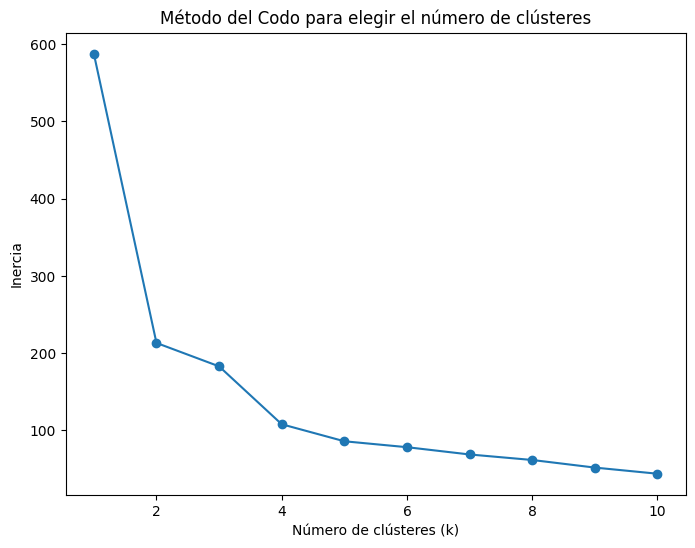

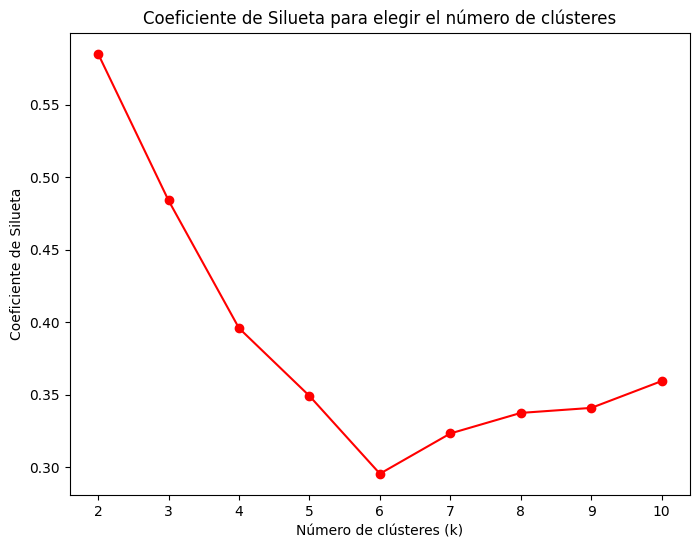

Silhouette Score para el modelo con 3 clústeres: 0.48398336512410556


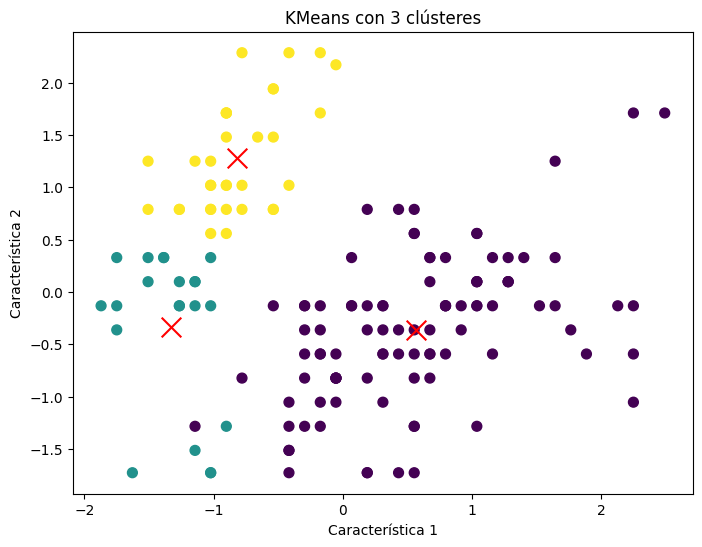

Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: 3
Centroides de los clústeres:
[[ 0.57100359 -0.3636949   0.69111943  0.66315198]
 [-1.32765367 -0.33784116 -1.13723572 -1.11486192]
 [-0.81623084  1.28059159 -1.28683379 -1.2197118 ]]


In [3]:
# --------------------------------------------------------
# BLOQUE 1 - IMPORTACIONES Y PREPROCESAMIENTO DE LOS DATOS
# --------------------------------------------------------


# 0. Importar las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data  # Las características- IMPRESCINDIBLE !!
y = iris.target  # Las etiquetas (aunque no las usaremos para el clustering)

# Escalar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Gestión de outliers (usaremos el rango intercuartílico para detectar outliers)
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers_condition = ((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR)))

# Sustituir outliers con los valores más cercanos dentro del rango permitido
X_scaled_outliers_handled = np.copy(X_scaled)
for i in range(X_scaled.shape[1]):
    X_scaled_outliers_handled[:, i] = np.clip(X_scaled_outliers_handled[:, i], - 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i])
    
# -------------------------------------------------------------------------

# ---------------------------------------
# BLOQUE 2 - AJUSTE INICIAL DE PARÁMETROS
# ---------------------------------------

# 3. Método del Codo: Determinar el número óptimo de clústeres
inertia = []  # Guardaremos la inercia para diferentes valores de k (número de clústeres)
for k in range(1, 11):  # Probar para k = 1 hasta k = 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para cada k (Método del Codo)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.show()

# 4. Coeficiente de Silueta: Evaluar la calidad de los clústeres para diferentes valores de k
sil_scores = []  # Guardamos los coeficientes de silueta para cada k
for k in range(2, 11):  # El coeficiente de silueta solo es válido para k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    sil_score = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)  # Calculamos el coeficiente de silueta
    sil_scores.append(sil_score)

# Graficar el coeficiente de silueta para cada k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='red')
plt.title('Coeficiente de Silueta para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.show()

# A partir de la gráfica, elegimos el número óptimo de clústeres (suponemos k=3)
optimal_k = 3

# -------------------------------------------------------------------------

# ---------------------------------------------------------------------
# BLOQUE 3 - CREAMOS Y ENTRENAMOS EL MODELO CON EL Nº DE CLÚSTER ÓPTIMO
# ---------------------------------------------------------------------

# 5. Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_outliers_handled)


# -------------------------------------------------------------------------

# --------------------------------------------------
# BLOQUE 4 - EVALUAMOS Y VISUALIZAMOS LOS RESULTADOS
# --------------------------------------------------
# 6. Evaluación del modelo usando Silhouette Score con el número óptimo de clústeres
sil_score_optimal = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} clústeres: {sil_score_optimal}")

# 7. Visualizar los resultados de KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # Graficamos los puntos de datos coloreados por su clúster
centroids = kmeans.cluster_centers_  # Los centroides de los clústeres
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)  # Graficamos los centroides en rojo
plt.title(f'KMeans con {optimal_k} clústeres')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# 8. Resultados finales
print(f'Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: {optimal_k}')
print('Centroides de los clústeres:')
print(kmeans.cluster_centers_)


### Wine Dataset de Scikit-Learn

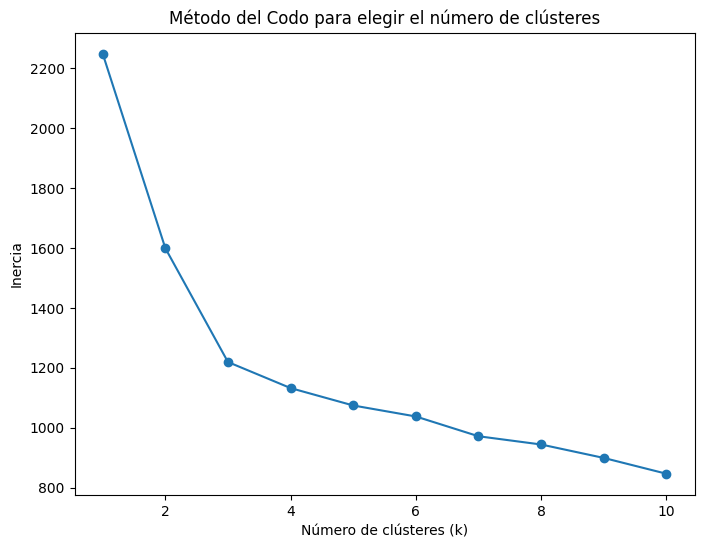

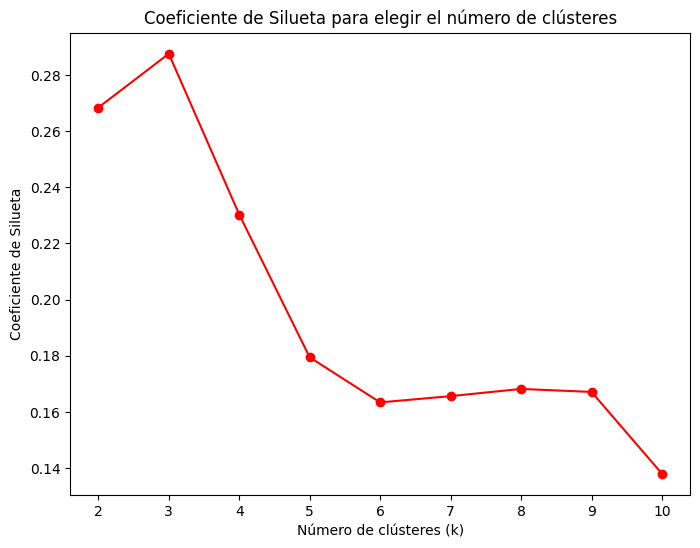

Silhouette Score para el modelo con 3 clústeres: 0.28754047761382057


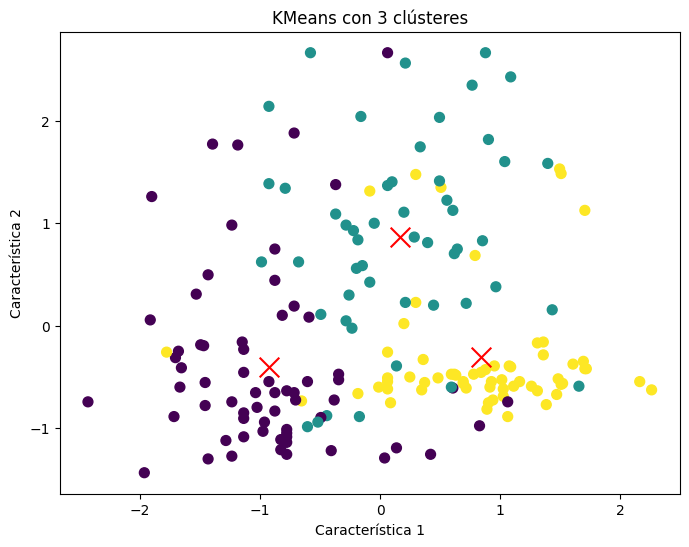

Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: 3
Centroides de los clústeres:
[[-0.92607185 -0.40091211 -0.47602917  0.16875394 -0.50899514 -0.07598265
   0.02081257 -0.03353357  0.04263152 -0.90191402  0.4561507   0.27076419
  -0.75384618]
 [ 0.16490746  0.86177837  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.91142847 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.34746109 -0.62278389  0.5436126   0.88523736
   0.97781956 -0.56208965  0.57237394  0.17106348  0.47398365  0.77924711
   1.12518529]]


In [7]:
# 0. Importar las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Cargar el conjunto de datos Wine
wine = load_wine()
X = wine.data  # Las características
y = wine.target  # Las etiquetas (aunque no las usaremos para el clustering)

# Escalar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Gestión de outliers (usaremos el rango intercuartílico para detectar outliers)
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
outliers_condition = ((X_scaled < (Q1 - 1.5 * IQR)) | (X_scaled > (Q3 + 1.5 * IQR)))

# Sustituir outliers con los valores más cercanos dentro del rango permitido
X_scaled_outliers_handled = np.copy(X_scaled)
for i in range(X_scaled.shape[1]):
    X_scaled_outliers_handled[:, i] = np.clip(X_scaled_outliers_handled[:, i],
                                              Q1[i] - 1.5 * IQR[i], Q3[i] + 1.5 * IQR[i])

# 3. Método del Codo: Determinar el número óptimo de clústeres
inertia = []  # Guardaremos la inercia para diferentes valores de k (número de clústeres)
for k in range(1, 11):  # Probar para k = 1 hasta k = 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para cada k (Método del Codo)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.show()

# 4. Coeficiente de Silueta: Evaluar la calidad de los clústeres para diferentes valores de k
sil_scores = []  # Guardamos los coeficientes de silueta para cada k
for k in range(2, 11):  # El coeficiente de silueta solo es válido para k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_outliers_handled)
    sil_score = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)  # Calculamos el coeficiente de silueta
    sil_scores.append(sil_score)

# Graficar el coeficiente de silueta para cada k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='red')
plt.title('Coeficiente de Silueta para elegir el número de clústeres')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Coeficiente de Silueta')
plt.show()

# A partir de la gráfica, elegimos el número óptimo de clústeres (suponemos k=3)
optimal_k = 3

# 5. Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled_outliers_handled)

# 6. Evaluación del modelo usando Silhouette Score con el número óptimo de clústeres
sil_score_optimal = silhouette_score(X_scaled_outliers_handled, kmeans.labels_)
print(f"Silhouette Score para el modelo con {optimal_k} clústeres: {sil_score_optimal}")

# 7. Visualizar los resultados de KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled_outliers_handled[:, 0], X_scaled_outliers_handled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)  # Graficamos los puntos de datos coloreados por su clúster
centroids = kmeans.cluster_centers_  # Los centroides de los clústeres
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)  # Graficamos los centroides en rojo
plt.title(f'KMeans con {optimal_k} clústeres')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# 8. Resultados finales
print(f'Número óptimo de clústeres según el Método del Codo y el Coeficiente de Silueta: {optimal_k}')
print('Centroides de los clústeres:')
print(kmeans.cluster_centers_)
